# Indian Startup Dataset

Dataset Source: Coding Ninjas(Data Science and Machine Learning Course)

<b><u>Description: </u></b>
- This dataset has funding information of the Indian startups from January 2015 to August 2017.
- The data is in Comma Seperated Values(CSV) format.
<br><br>

### We have to preprocess(clean) the dataset first, to answer the questions.

## Importing necessary libraries.

In [1]:
# used for scientific computation
import numpy as np

# used for data analysis, manipulation and extraction
import pandas as pd

# data visualization library
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

# Regular Expressions
import re

In [2]:
# loading the dataset
df = pd.read_csv('startup_funding.csv', index_col="SNo")

# self-made dataset of each columns' description
info = pd.read_csv("startup_description.csv")
info

,Columns,Description
0,SNo,Serial number.
1,Date,Date of funding in format DD/MM/YYYY.
2,StartupName,Name of the startup which got funded.
3,IndustryVertical,Industry to which the startup belongs.
4,SubVertical,Sub-category of the industry type.
5,CityLocation,City which the startup is based out of.
6,InvestorsName,Name of the investors involved in the funding ...
7,InvestmentType,Either Private Equity or Seed Funding.
8,AmountInUSD,Funding Amount in USD.
9,Remarks,"Other information, if any."


In [3]:
# Check the shape of the dataset

rows, cols = df.shape
print(f"The dataset has {rows} datapoints(rows) and {cols} features(columns).")

The dataset has 2372 datapoints(rows) and 9 features(columns).


## Looking at the Sample of the dataset

In [4]:
# to view first 5 data points

df.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
SNo,,,,,,,,,
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [5]:
# to view last 5 data points

df.tail()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
SNo,,,,,,,,,
2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


## Visualization of null enteries

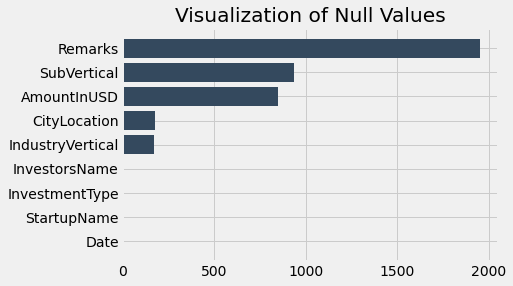

In [6]:
nullVal = {}
for i in df.columns:
    nullVal[i] = df[i].isnull().sum()

# sorting the dictionary based on number of null enteries
nullVal = dict(sorted(nullVal.items(), key=lambda x:x[1]))

col = list(nullVal.keys())
val = list(nullVal.values())

plt.barh(col, val, color = "#34495e")
plt.title("Visualization of Null Values")

plt.show()

### *As observed above, column remarks has highest density of null values therefore we can drop that column.*

In [7]:
df.drop(columns = ['Remarks'], inplace = True)

## Does datatype match as observed in the sample above ?

In [8]:
print("The data types of the features are: ")
print("-----------------------------------")

print(df.dtypes)

The data types of the features are: 
-----------------------------------
Date                object
StartupName         object
IndustryVertical    object
SubVertical         object
CityLocation        object
InvestorsName       object
InvestmentType      object
AmountInUSD         object
dtype: object


### *After observing the sample and the datatypes of each feature, there seems to be mismatch in the datatype of column AmountInUSD(which should be numeric) and the column InvestmentType(which should be categorical).*

In [9]:
# replacing all the NaN values with '0'
# can be replaced with some other values but '0' seems right in this case.
df['AmountInUSD'].fillna("0", inplace=True)

# converting each value to integer
df['AmountInUSD'] = df['AmountInUSD'].map(lambda x: int(x.replace(',', '')))

df['AmountInUSD']

SNo
0       1300000
1             0
2             0
3        500000
4        850000
         ...   
2367    4500000
2368     825000
2369    1500000
2370          0
2371     140000
Name: AmountInUSD, Length: 2372, dtype: int64

## Listing all the unique values of 'InvestmentType' column

In [10]:
print(*(df['InvestmentType'].unique()), sep='\n')

Private Equity
Seed Funding
Debt Funding
nan
SeedFunding
PrivateEquity
Crowd funding
Crowd Funding


In [11]:
# replacing typos in the InvestmentType

df['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace = True)
df['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace = True)
df['InvestmentType'].replace('Crowd funding', 'Crowd Funding', inplace = True)

In [12]:
print(*(df['InvestmentType'].unique()), sep='\n')

Private Equity
Seed Funding
Debt Funding
nan
Crowd Funding


In [13]:
df['InvestmentType'].isnull().sum()

1

In [14]:
df.dropna(axis='index', how='all', subset=['InvestmentType'], inplace=True)
df['InvestmentType'] = df['InvestmentType'].astype('category')

## Cleaning the 'Date' columns

In [15]:
df['Date'].head()

SNo
0    01/08/2017
1    02/08/2017
2    02/08/2017
3    02/08/2017
4    02/08/2017
Name: Date, dtype: object

In [16]:
# to check any mistakes in the dates
dateRegex = re.compile(r'\d+/\d+/\d+')

def checkDate(date):
    mo = dateRegex.search(date)
    return mo == None
    
filt_date = df['Date'].apply(checkDate)
df[filt_date]['Date']

SNo
2103     12/05.2015
2104     12/05.2015
2159     13/04.2015
2339     15/01.2015
2357    22/01//2015
Name: Date, dtype: object

In [17]:
# now we can replace those inconsistent date format with the right one

df['Date'].replace('12/05.2015', '12/05/2015', inplace=True)
df['Date'].replace('13/04.2015', '13/04/2015', inplace=True)
df['Date'].replace('15/01.2015', '15/01/2015', inplace=True)
df['Date'].replace('22/01//2015', '22/01/2015', inplace=True)

In [18]:
# converting to the datetime data type.

df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.dtypes

Date                datetime64[ns]
StartupName                 object
IndustryVertical            object
SubVertical                 object
CityLocation                object
InvestorsName               object
InvestmentType            category
AmountInUSD                  int64
dtype: object

## Cleaning the 'IndustryVertical' column

In [20]:
# replacing null values with "Others"
df['IndustryVertical'].fillna("Others", inplace = True)

industry = df['IndustryVertical'].unique()
print(f"There are {len(industry)} unique IndustryTypes")

There are 743 unique IndustryTypes


In [21]:

filt = df['IndustryVertical'].str.contains('ecommerce|marketplace|commerce|e-tailer', flags=re.IGNORECASE)
df.loc[filt, 'IndustryVertical'] = 'eCommerce'


filt = df['IndustryVertical'].str.contains('Ed-Tech|eLearning|education|E-learning|learning', flags=re.IGNORECASE)
df.loc[filt, 'IndustryVertical'] = "edTech"


filt = df['IndustryVertical'].str.contains('BFSI|Financial\sTech|Finance', flags=re.IGNORECASE)
df.loc[filt, 'IndustryVertical'] = "Finance"


filt = df['IndustryVertical'].str.contains('Healthcare|health|medical|dental', flags=re.IGNORECASE)
df.loc[filt, 'IndustryVertical'] = "Healthcare"


filt = df['IndustryVertical'].str.contains('search|aggregator|internet|interne|online|platform|web|video|portal', 
                                           flags=re.IGNORECASE)
df.loc[filt, 'IndustryVertical'] = "Internet"


filt = df['IndustryVertical'].str.contains("app|software|manufacturers|manufacturer|creator|Assisstant", flags=re.IGNORECASE)
df.loc[filt, 'IndustryVertical'] = "Technology"


filt = df['IndustryVertical'].str.contains("Logistics|Logistic", flags=re.IGNORECASE)
df.loc[filt, 'IndustryVertical'] = "Logistics"


filt = df['IndustryVertical'].str.contains("food|tea|Gourmet|beverages|beverage|restaurant|qsr", flags=re.IGNORECASE)
df.loc[filt, 'IndustryVertical'] = "Food"


filt = df['IndustryVertical'].str.contains("brand|solution|solutions|services|service|consulting|svcs|data", flags=re.IGNORECASE)
df.loc[filt, 'IndustryVertical'] = "Service"

In [22]:
topIndustries = ["Food", "Others", "Finance",
                 "Service", "Internet", "eCommerce", 
                 "Technology", "edTech", "Logistics", "Healthcare"]

filt = df['IndustryVertical'].isin(topIndustries)

df.loc[filt, "IndustryVertical"].value_counts()

Internet      1098
Technology     400
eCommerce      354
Others         177
Healthcare      63
Service         59
edTech          55
Logistics       42
Food            37
Finance         14
Name: IndustryVertical, dtype: int64

## Cleaning the 'CityLocation' columns

In [23]:
# for i in df['CityLocation'].unique():
#     print(i)

In [24]:
df['CityLocation'].isnull().sum()

179

In [25]:
# handling null values
df['CityLocation'].fillna("Not Specified", inplace=True)

df['CityLocation'] = df['CityLocation'].map(lambda x: re.sub("\s*/\s*", "/", x))

#### The code below cleans the CityLocation's values

In [26]:
filt = df['CityLocation'].str.contains("New Delhi|Delhi", flags=re.IGNORECASE)
df.loc[filt, 'CityLocation'] = "New Delhi"

filt = df['CityLocation'].str.contains("Bangalore", flags=re.IGNORECASE)
df.loc[filt, 'CityLocation'] = "Bangalore"

filt = df['CityLocation'].str.contains("Noida", flags=re.IGNORECASE)
df.loc[filt, 'CityLocation'] = "Noida"

filt = df['CityLocation'].str.contains("Hyderabad", flags=re.IGNORECASE)
df.loc[filt, 'CityLocation'] = "Hyderabad"

filt = df['CityLocation'].str.contains("Mumbai", flags=re.IGNORECASE)
df.loc[filt, 'CityLocation'] = "Mumbai"

filt = df['CityLocation'].str.contains("Pune", flags=re.IGNORECASE)
df.loc[filt, 'CityLocation'] = "Pune"

filt = df['CityLocation'].str.contains("Gurgaon", flags=re.IGNORECASE)
df.loc[filt, 'CityLocation'] = 'Gurgaon'

filt = df['CityLocation'].str.contains("India", flags=re.IGNORECASE)
df.loc[filt, 'CityLocation'] = 'India'

filt = df['CityLocation'].str.contains("Chennai", flags=re.IGNORECASE)
df.loc[filt, 'CityLocation'] = "Chennai"

filt = df['CityLocation'].str.contains("US")
df.loc[filt, 'CityLocation'] = "USA"

In [27]:
# df['CityLocation'].value_counts()

### Most of the dataset have been cleaned and Missing values have been handled.

In [28]:
# df

# TASK 1

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance.<br>
But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR(including Gurgaon, Noida and New Delhi).

As a friend, you want to help him deciding the location. 

- Find the location where startups has received funding maximum number of times. 

- Plot the bar graph between location and number of funding. 

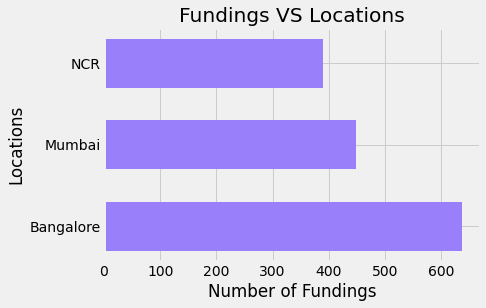

Bangalore seems to be perfect location for establishment of the startup.


In [29]:
locGroup = df.groupby('CityLocation')

NCR = ["Gurgaon", "Noida", "New Delhi"]
locations = ["Bangalore", "Mumbai"]

locs = {}
for i in (locations + NCR):
    if i in NCR:
        locs["NCR"] = locs.get(i, 0) + locGroup.get_group(i).shape[0]
    else:
        locs[i] = locs.get(i, 0) + locGroup.get_group(i).shape[0]

fundings = list(locs.values())
locs = list(locs.keys())

plt.barh(locs, fundings, height = 0.6, color = "#9980FA")

plt.title("Fundings VS Locations")
plt.xlabel("Number of Fundings")
plt.ylabel("Locations")

plt.show()

print("Bangalore seems to be perfect location for establishment of the startup.")

# Task 2

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup.<br>
Your list will increase the chance of your friend startup getting some initial investment by contacting these investors.

- Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also).
- In a startup, multiple investors might have invested. So consider each investor for that startup.
- Ignore undisclosed investors.

In [30]:
df['InvestorsName'].fillna("Undisclosed Investor", inplace=True)

In [31]:
filt = df['InvestorsName'].str.contains("undisclosed investors", flags = re.IGNORECASE)

df.loc[filt, 'InvestorsName'] = "Undisclosed Investors"

842


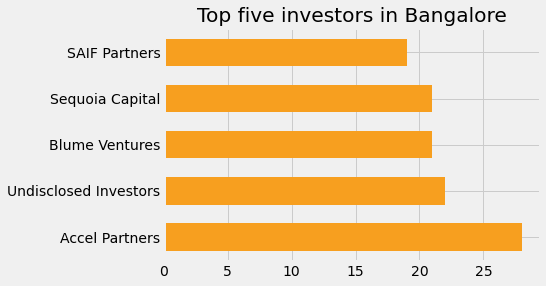

In [32]:
investors = {}

filt = (df['CityLocation'] == "Bangalore")
for i in df.loc[filt, 'InvestorsName'].values:
    for name in i.split(','):
        name = name.strip()
        investors[name] = investors.get(name, 0) + 1

# Total investors in Bangalore
print(len(investors))

# sorting investors based on number of times they have invested
investors = dict(sorted(investors.items(), key=lambda x: x[1], reverse=True)[:5])

names = list(investors.keys())
i_times = list(investors.values())

plt.barh(names, i_times, height = 0.6, color = "#F79F1F")

plt.title("Top five investors in Bangalore")

plt.show()

# Task 3

Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding.

- Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding.

In [33]:
# extracting data for only NCR, Bangalore and Mumbai

filt = df['CityLocation'].isin(locations+NCR)

new_df = df[filt]

In [34]:
# checking the counts of each InvestmentType

new_df['InvestmentType'].value_counts()

Seed Funding      964
Private Equity    830
Debt Funding        0
Crowd Funding       0
Name: InvestmentType, dtype: int64

In [35]:
filt = (new_df['InvestmentType'] == "Seed Funding")

investors = {}

for i in new_df.loc[filt, "InvestorsName"].values:
    for name in i.split(','):
        name = name.strip()
        if(name not in  ['', 'Undisclosed Investors']):
            investors[name] = investors.get(name, 0) + 1

investors = dict(sorted(investors.items(), key=lambda x:x[1], reverse=True)[:5])
print(*(list(investors.keys())), sep = '\n')

Indian Angel Network
Rajan Anandan
Kunal Shah
LetsVenture
Anupam Mittal


                                           END OF Project